In [187]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [188]:
df = pd.read_csv("data/Coursera.csv")

In [189]:
#first 5 rows
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


#### Exploring dataset

In [190]:
def explore_dataset(data):
    print(f"1. Dimentions of the Dataset : {data.shape}\n")
    print(f"2. Features in Dataset : \n{data.columns}\n")
    print(f"3. Duplicated count : {data.duplicated().sum()}\n")
    print(f"4. Info : \n{data.info()}\n")

In [191]:
explore_dataset(df)

1. Dimentions of the Dataset : (3522, 7)

2. Features in Dataset : 
Index(['Course Name', 'University', 'Difficulty Level', 'Course Rating',
       'Course URL', 'Course Description', 'Skills'],
      dtype='object')

3. Duplicated count : 98

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB
4. Info : 
None



In [192]:
df.describe()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
count,3522,3522,3522,3522,3522,3522,3522
unique,3416,184,5,31,3424,3397,3424
top,Google Cloud Platform Fundamentals: Core Infra...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/gcp-fundamentals,This course introduces you to important concep...,Google Cloud Platform Big Data Cloud Infrast...
freq,8,562,1444,740,8,8,8


In [193]:
# remove all duplicates
df = df.drop_duplicates()

In [194]:
df.duplicated().sum()

0

In [195]:
# checking null values in data
df.isnull().sum()

Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3424 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3424 non-null   object
 1   University          3424 non-null   object
 2   Difficulty Level    3424 non-null   object
 3   Course Rating       3424 non-null   object
 4   Course URL          3424 non-null   object
 5   Course Description  3424 non-null   object
 6   Skills              3424 non-null   object
dtypes: object(7)
memory usage: 214.0+ KB


In [197]:
df.nunique()

Course Name           3416
University             184
Difficulty Level         5
Course Rating           31
Course URL            3424
Course Description    3397
Skills                3424
dtype: int64

In [198]:
#check count of courses in each difficulity level
df["Difficulty Level"].value_counts()

Beginner          1406
Advanced           991
Intermediate       823
Conversant         154
Not Calibrated      50
Name: Difficulty Level, dtype: int64

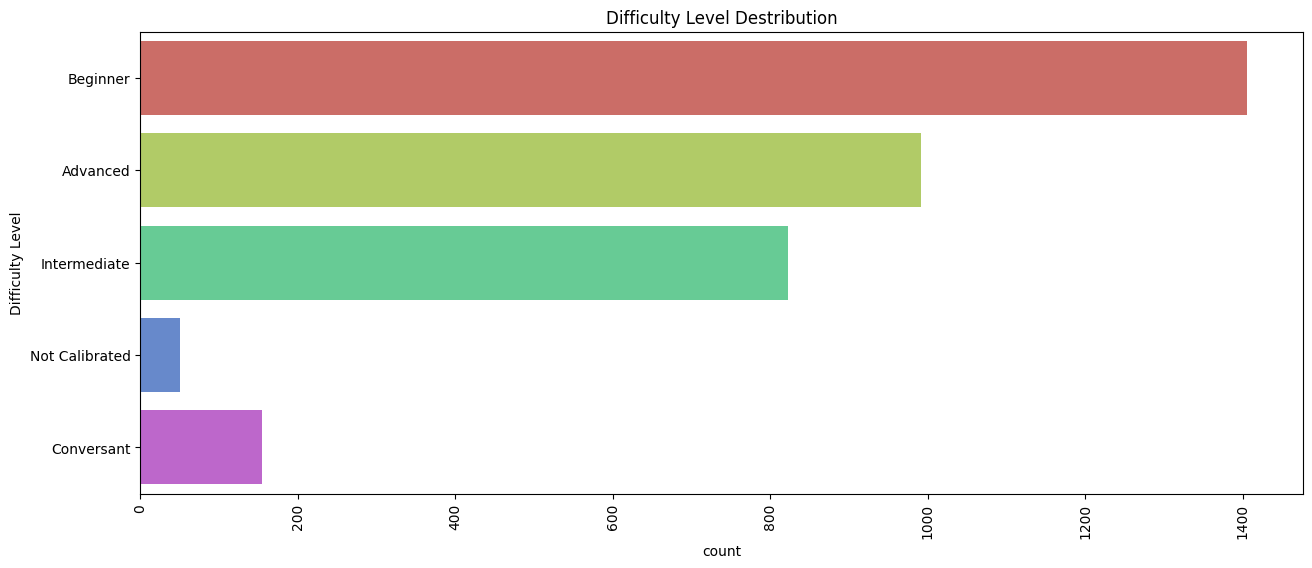

In [199]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, y=df["Difficulty Level"],
palette = 'hls')
plt.xticks(rotation = 90)
plt.title("Difficulty Level Destribution")
plt.show()

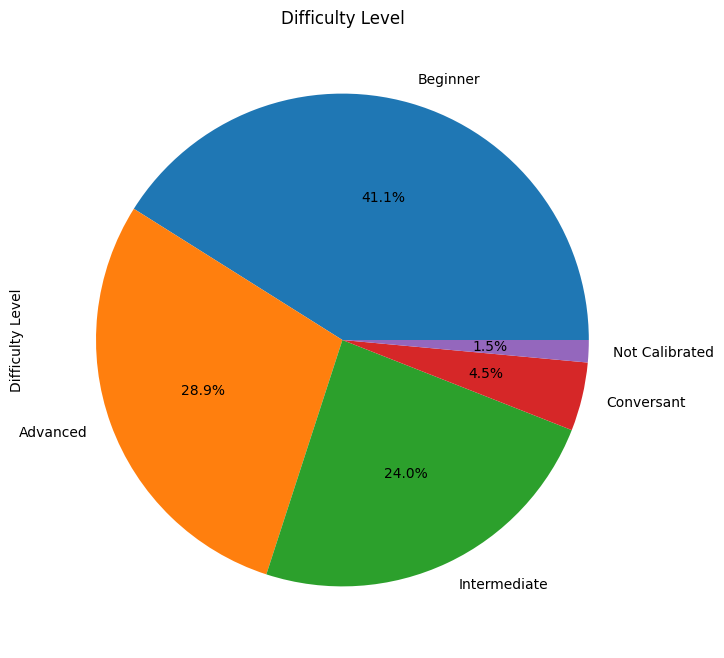

In [200]:
df['Difficulty Level'].value_counts().plot(kind='pie',
figsize=(8, 8),
autopct='%1.1f%%')
plt.xticks(rotation = 90)
plt.title("Difficulty Level")
plt.show()

In [201]:
df['Course Rating'].unique()

array(['4.8', '4.1', '4.6', '4.7', '3.3', '4.9', '4.3', 'Not Calibrated',
       '4', '4.4', '3.4', '4.5', '4.2', '5', '3.5', '3.7', '3', '3.6',
       '3.8', '3.9', '2.9', '2.6', '2.8', '2', '3.1', '3.2', '2.5', '2.4',
       '1', '1.9', '2.3'], dtype=object)

In [202]:
df["Course Rating"].value_counts()

4.7               707
4.6               602
4.8               585
4.5               380
4.4               235
4.9               174
4.3               159
4.2               120
5                  89
4.1                85
Not Calibrated     82
4                  50
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
3.1                 1
2.5                 1
1.9                 1
2.3                 1
Name: Course Rating, dtype: int64

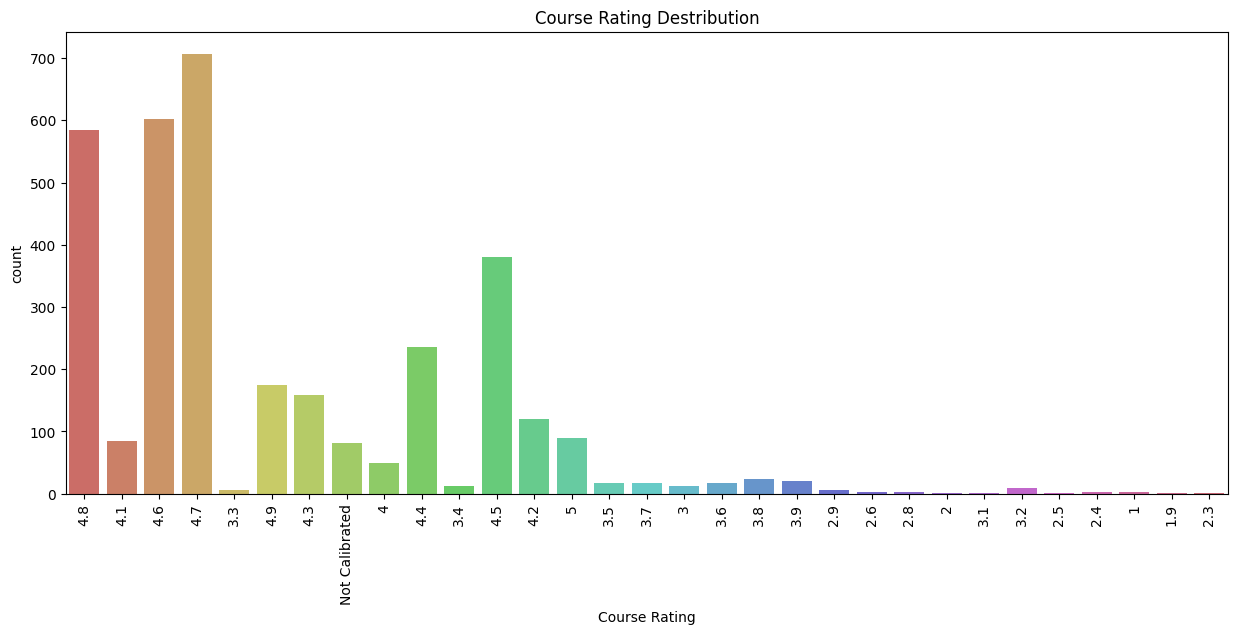

In [203]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x=df["Course Rating"],
palette = 'hls')
plt.xticks(rotation = 90)
plt.title("Course Rating Destribution")
plt.show()

Implemantation

In [204]:
df["University"].unique()

array(['Michigan State University', 'Coursera Project Network',
       '�cole Polytechnique', 'IESE Business School',
       'The Chinese University of Hong Kong', 'University of Washington',
       'The State University of New York',
       'Saint Petersburg State University',
       'University of California, Irvine',
       'University of Colorado System', 'Rice University',
       'University of Geneva', 'University of California, Davis',
       '�cole Polytechnique F�d�rale de Lausanne', 'Google Cloud',
       'National Research Tomsk State University',
       'University of Florida', 'Johns Hopkins University',
       'Universiteit Leiden', 'The University of Edinburgh',
       'Columbia University',
       'Korea Advanced Institute of Science and Technology(KAIST)',
       'University of Maryland, College Park', 'IBM',
       'The Hong Kong University of Science and Technology',
       'University of Illinois at Urbana-Champaign',
       'University of Cape Town', 'Goldman Sachs

In [205]:
df["University"].value_counts()

Coursera Project Network                      562
University of Illinois at Urbana-Champaign    138
University of Michigan                        101
Johns Hopkins University                      101
University of Colorado Boulder                101
                                             ... 
GitLab                                          1
Yeshiva University                              1
University of Glasgow                           1
Laureate Education                              1
The World Bank Group                            1
Name: University, Length: 184, dtype: int64

In [206]:
df = df[['Course Name','Difficulty Level','Course Description','Skills']]

In [207]:
df.head()

,Course Name,Difficulty Level,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Beginner,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Beginner,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,Advanced,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,Intermediate,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Beginner,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [208]:
def clean(data):
    data['Course Name'] = data['Course Name'].str.replace(' ',',')
    data['Course Name'] = data['Course Name'].str.replace(',,',',')
    data['Course Name'] = data['Course Name'].str.replace(':','')
    data['Course Description'] = data['Course Description'].str.replace(' ',',')
    data['Course Description'] = data['Course Description'].str.replace(',,',',')
    data['Course Description'] = data['Course Description'].str.replace('_','')
    data['Course Description'] = data['Course Description'].str.replace(':','')
    data['Course Description'] = data['Course Description'].str.replace('(','')
    data['Course Description'] = data['Course Description'].str.replace(')','')
    data['Skills'] = data['Skills'].str.replace('(','')
    data['Skills'] = data['Skills'].str.replace(')','')
    return data

In [209]:
df=clean(df)

In [210]:
df['Keywords']=df["Course Name"]+df["Difficulty Level"]+df["Course Description"]
df.head()


,Course Name,Difficulty Level,Course Description,Skills,Keywords
0,"Write,A,Feature,Length,Screenplay,For,Film,Or,...",Beginner,"Write,a,Full,Length,Feature,Film,Script,In,thi...",Drama Comedy peering screenwriting film D...,"Write,A,Feature,Length,Screenplay,For,Film,Or,..."
1,"Business,Strategy,Business,Model,Canvas,Analys...",Beginner,"By,the,end,of,this,guided,project,you,will,be,...",Finance business plan persona user experienc...,"Business,Strategy,Business,Model,Canvas,Analys..."
2,"Silicon,Thin,Film,Solar,Cells",Advanced,"This,course,consists,of,a,general,presentation...",chemistry physics Solar Energy film lambda...,"Silicon,Thin,Film,Solar,CellsAdvancedThis,cour..."
3,"Finance,for,Managers",Intermediate,"When,it,comes,to,numbers,there,is,always,more,...",accounts receivable dupont analysis analysis...,"Finance,for,ManagersIntermediateWhen,it,comes,..."
4,"Retrieve,Data,using,Single-Table,SQL,Queries",Beginner,"In,this,course,you�ll,learn,how,to,effectively...",Data Analysis select sql database management...,"Retrieve,Data,using,Single-Table,SQL,QueriesBe..."


In [211]:
print(df['Keywords'].iloc[1])

Business,Strategy,Business,Model,Canvas,Analysis,with,MiroBeginnerBy,the,end,of,this,guided,project,you,will,be,fluent,in,identifying,and,creating,Business,Model,Canvas,solutions,based,on,previous,high-level,analyses,and,research,data.,This,will,enable,you,to,identify,and,map,the,elements,required,for,new,products,and,services.,Furthermore,it,is,essential,for,generating,positive,results,for,your,business,venture.,This,guided,project,is,designed,to,engage,and,harness,your,visionary,and,exploratory,abilities.,You,will,use,proven,models,in,strategy,and,product,development,with,the,Miro,platform,to,explore,and,analyse,your,business,propositions.,,We,will,practice,critically,examining,results,from,previous,analysis,and,research,results,in,deriving,the,values,for,each,of,the,business,model,sections.
